# 电气工程建模与仿真——Fitting

通过采样、实验等方式获得若干离散数据后，我们希望得到一个与当前数据分布最接近的函数（或曲线），这个过程即为拟合。
主要利用`scipy.optimize`中的`curve_fit`接口进行拟合：
调包：

In [2]:
# 官方文档：https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
import pandas
print('----')


----


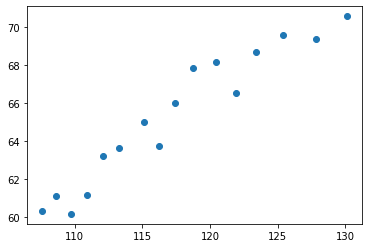

In [3]:
# 从别人的项目里拿一些假数据，仍然可以用之前np.linspace()等方法自己生成...whatever
url = 'http://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
# 这里可以看到，我们可以用pandas直接从网上把数据下载下来
#dataframe = read_csv(url, header=None)
# 所以你可以把它存下来下次直接读取
#dataframe.to_csv('longley.csv')
dataframe = read_csv('longley.csv')
data = dataframe.values
x, y = data[:, 5], data[:, -1]
plt.scatter(x, y)


## 多项式拟合
我们可以尝试用多项式来拟合这些点，多项式就是：$f=c+a_1x+a2x^2+....a_nx^n$，我们要拟合就是去顶多项式的系数，
这里大家可以回顾一下第一颗说的东西，就是一个模型$f(\theta,x)$，这个拟合的多项式就是一个模型，你和的过程就是建模，
就是确定一组最优的theta。

[-4.69046767e-04  1.55343328e-01 -1.65338892e+01  6.24775262e+02]


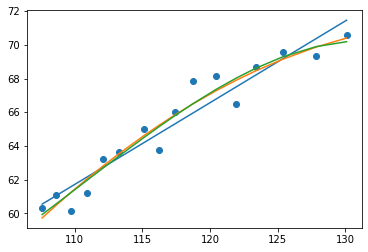

In [4]:
# 非常简单，给出下xy以后后面一个参数就是阶数。
p = []
for i in range(1, 4):
    p.append(np.polyfit(x, y, i))


# 你可以看看这个系数,三阶得得有4个系数
print(p[2])
plt.scatter(x, y)
for poly in p:
    plt.plot(x, np.poly1d(poly)(x))



# 任意函数拟合#  下面给大家讲一个高端的

In [ ]:
# 定义线性拟合函数


def objective(x, a, b):
    return a * x + b


popt, _ = curve_fit(objective, x, y)  # 该方法返回两个值，第二个值为估计参数值的协方差这里暂时用不到
a, b = popt  # unzip
print('y = {}* x + {}'.format(a, b))

plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='r')



## N次多项式同理，这里以三次为例：

In [ ]:


def objective(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


popt, _ = curve_fit(objective, x, y)
a, b, c, d = popt
print('y = {}* x^3 + {}* x^2 + {}* x + {}'.format(a, b, c, d))

plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c, d)
plt.plot(x_line, y_line, '--', color='r')


 对任意函数：

In [ ]:


def objective(x, a, b, c):
    return np.exp(a*x) + b*np.sin(x) + c*x


# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = e^({}*x) + {}*sin(x) + {}*x'.format(a, b, c))

plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
plt.plot(x_line, y_line, '--', color='r')


** 总结一下，`curve_fit`方法需要你自己自定义一个函数，并给出待求解的参数。
`curve_fit`方法将根据非线性最小二乘给出基于你函数形式的最佳逼近的参数解，并作为元组存储在其第一个返回值中。
该方法比较灵活简单，同时需要你对拟合的函数形式有一定的了解。
不知道用什么函数形式的时候就试试三次多项式吧！**